# Predicting Clothing Fit From Customer Reviews on Rent The Runway Dataset

#### My project is focused on predicting clothing fit using NLP techniques applied to customer reviews.

The dataset is available at https://www.kaggle.com/datasets/pypiahmad/clothing-fit-data?select=renttherunway_final_data.json

Rent the Runway is an online platform that allows users to rent, subscribe to, or buy designer clothing and accessories.

Online retail, especially Rent the Runway, faces challenges with sizing inconsistencies, which can lead to customer frustration and costly returns. Our solution uses advanced natural language processing methods to improve size recommendations, reduce returns, and enhance overall customer satisfaction.

However, inconsistent sizing feedback from customers poses a significant challenge. 
These discrepancies cause confusion and operational inefficiencies. This project seeks to address the fit challenge by analyzing customer reviews to classify items into fit categories, ensuring customers have a clearer idea of how an item will fit before renting. By addressing this problem, Rent the Runway can better serve its customers while reducing the operational burden of returns.

Let's load the nessasary libraries and explore the data.

In [1]:
import numpy as np
import pandas as pd 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# df_rtr = pd.read_json("data.zip/renttherunway_final_data.json", lines=True)
# pd.read_csv('data.zip', compression='zip')

# Open the zip file
with zipfile.ZipFile('data.zip') as z:
    # Open the JSON file
    with z.open('data/renttherunway_final_data.json') as f:
        df_rtr = pd.read_json(f, lines=True)

df_rtr.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df_rtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [4]:
df_rtr.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [5]:
df_rtr.duplicated().sum()

189

In [6]:
# Remove duplicate rows
df_rtr = df_rtr.drop_duplicates()

In [7]:
df_rtr.isnull().sum()

fit                   0
user_id               0
bust size         18392
item_id               0
weight            29955
rating               81
rented for           10
review_text           0
body type         14625
review_summary        0
category              0
height              675
size                  0
age                 960
review_date           0
dtype: int64

In [8]:
# Calculate the percentage of missing values in each column
(df_rtr.isnull().sum() * 100 / len(df_rtr)).round(2)

fit                0.00
user_id            0.00
bust size          9.56
item_id            0.00
weight            15.57
rating             0.04
rented for         0.01
review_text        0.00
body type          7.60
review_summary     0.00
category           0.00
height             0.35
size               0.00
age                0.50
review_date        0.00
dtype: float64

In [9]:
df_rtr['fit'].value_counts()

fit
fit      141909
small     25747
large     24699
Name: count, dtype: int64

In [10]:
df_rtr['bust size'].value_counts()

bust size
34b    27255
34c    23117
34d    18013
36c    13502
32d    11188
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: count, Length: 106, dtype: int64

In [11]:
df_rtr['rented for'].value_counts()

rented for
wedding            57737
formal affair      40380
party              35578
everyday           16810
other              15366
work               15029
date                7382
vacation            4062
party: cocktail        1
Name: count, dtype: int64

#### Let's visualize categorical variables

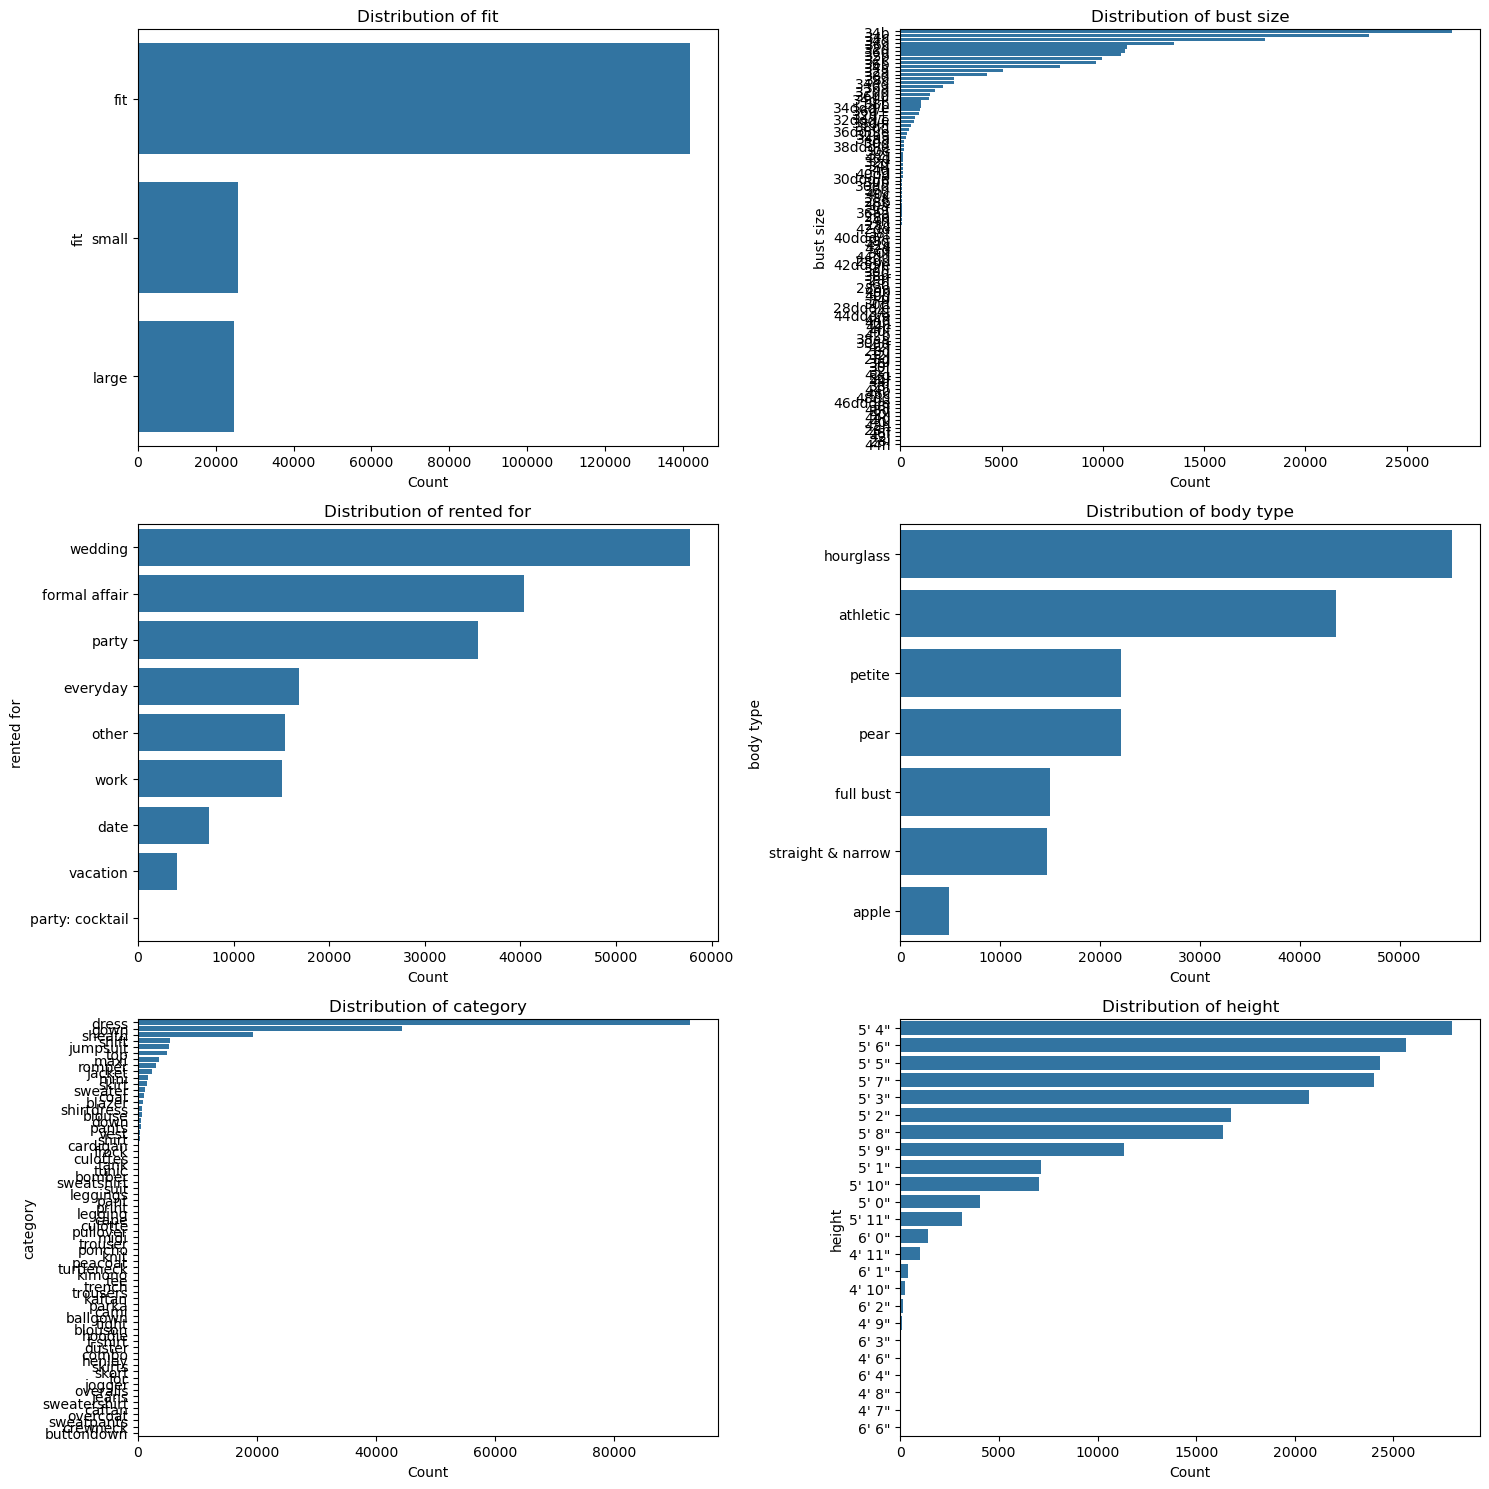

In [12]:
# Select categorical columns
categorical_columns = ['fit', 'bust size', 'rented for', 'body type', 'category', 'height']

# Set up the plot grid
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_rtr, y=col, ax=axes[i], order=df_rtr[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove empty plots if the number of categorical columns is odd
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### Let's visualize numeric varables

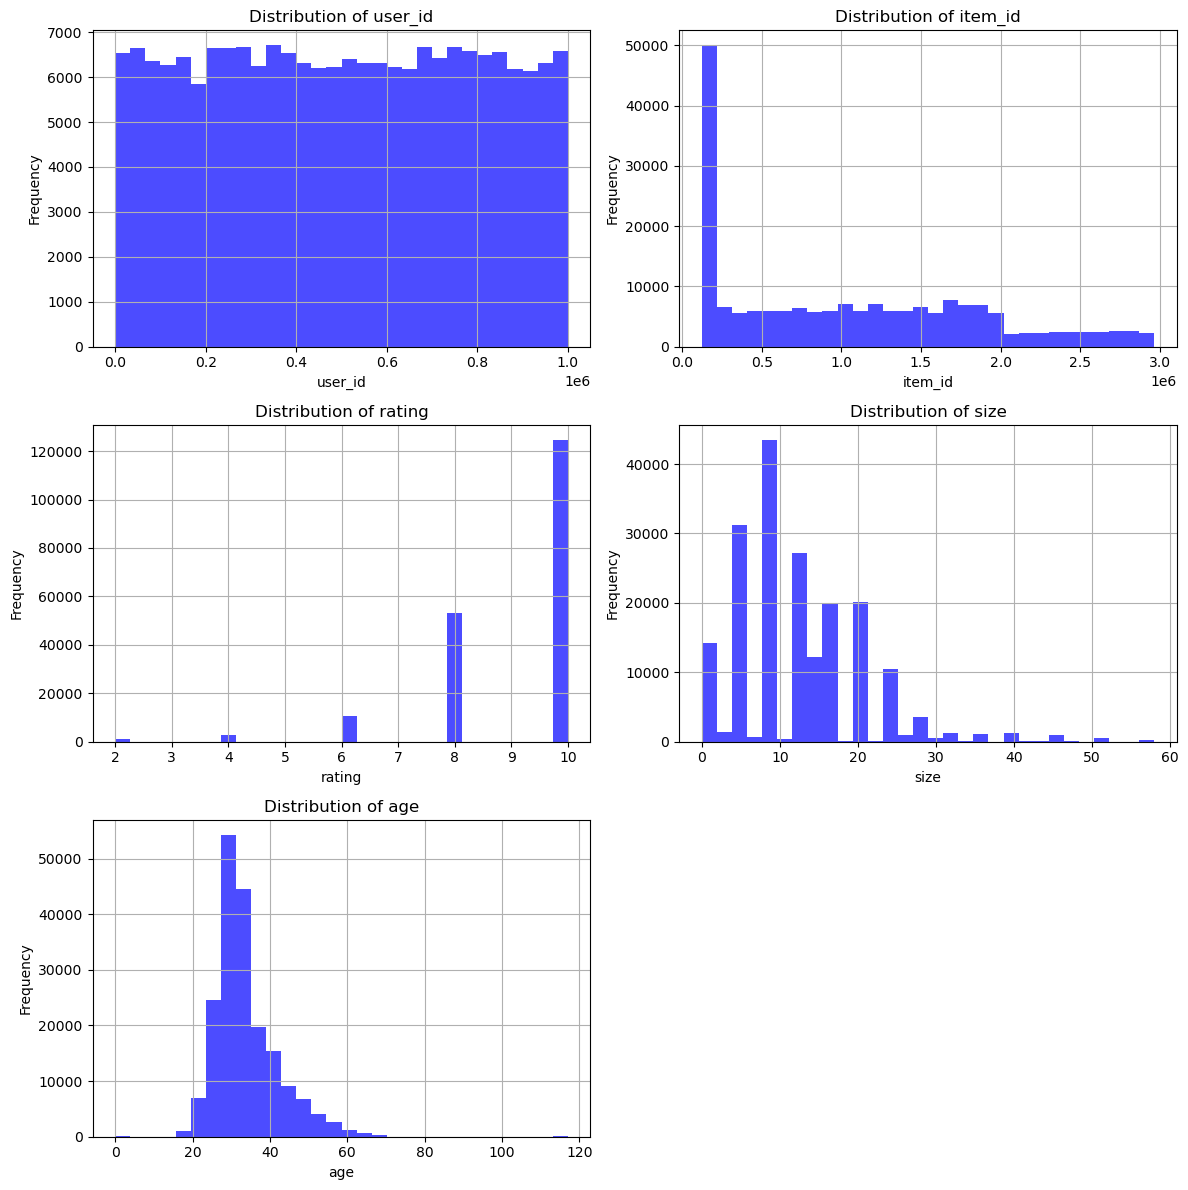

In [13]:
numeric_cols = df_rtr.select_dtypes(include=['number']).columns
n_cols = 2  # Number of plots per row
n_rows = -(-len(numeric_cols) // n_cols)  # Calculate the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df_rtr[col].hist(bins=30, ax=axes[i], alpha=0.7, color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Let's create a pipeline to clean the data by handling missing values and removing outliers.

In [ ]:
# Custom transformer to clean the weight column
class CleanWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Ensure we handle the DataFrame column correctly
        X_cleaned = X.iloc[:, 0].str.replace("lbs", "", regex=False).str.strip()
        return pd.to_numeric(X_cleaned, errors="coerce").values.reshape(-1, 1)


In [ ]:
# Custom transformer to remove outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            q1 = np.percentile(X[~np.isnan(X)], 25)
            q3 = np.percentile(X[~np.isnan(X)], 75)
            iqr = q3 - q1
            self.lower_bound = q1 - self.factor * iqr
            self.upper_bound = q3 + self.factor * iqr
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound, self.upper_bound)
        return X_clipped

In [ ]:
# Custom transformer to convert height to inches
class HeightToInchesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        def convert_to_inches(value):
            try:
                feet, inches = value.split("'")
                inches = inches.replace('"', '').strip()
                return int(feet) * 12 + int(inches)
            except:
                return np.nan
        
        X_converted = X.iloc[:, 0].apply(convert_to_inches)
        return X_converted.values.reshape(-1, 1)


In [ ]:
# Custom transformer to convert review_date to datetime
class ConvertToDateTime(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_converted = pd.to_datetime(X.iloc[:, 0], format="%B %d, %Y", errors="coerce")
        return X_converted.values.reshape(-1, 1)

In [ ]:
# Define preprocessing for each column
weight_transformer = Pipeline([
    ("clean_weight", CleanWeightTransformer()),
    ("remove_outliers", OutlierRemover()),
    ("impute_weight", SimpleImputer(strategy="median"))
])

bust_size_imputer = Pipeline([
    ("impute_bust_size", SimpleImputer(strategy="constant", fill_value="unknown"))
])

rating_imputer = Pipeline([
    ("impute_rating", SimpleImputer(strategy="median"))
])

rented_for_imputer = Pipeline([
    ("impute_rented_for", SimpleImputer(strategy="most_frequent"))
])

body_type_imputer = Pipeline([
    ("impute_body_type", SimpleImputer(strategy="constant", fill_value="unknown"))
])

height_transformer = Pipeline([
    ("convert_height", HeightToInchesTransformer()),
    ("impute_height", SimpleImputer(strategy="median"))
])

age_transformer = Pipeline([
    ("remove_outliers", OutlierRemover()),
    ("impute_age", SimpleImputer(strategy="median"))
])

review_date_transformer = Pipeline([
    ("convert_to_datetime", ConvertToDateTime())
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("bust_size", bust_size_imputer, ["bust size"]),
        ("weight", weight_transformer, ["weight"]),
        ("rating", rating_imputer, ["rating"]),
        ("rented_for", rented_for_imputer, ["rented for"]),
        ("body_type", body_type_imputer, ["body type"]),
        ("height", height_transformer, ["height"]),
        ("age", age_transformer, ["age"]),
        ("review_date", review_date_transformer, ["review_date"])
    ],
    remainder="passthrough"  # Keep other columns unchanged
)


In [ ]:
# Create the complete pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Apply the pipeline
transformed_data = pipeline.fit_transform(df_rtr)

In [14]:
# Recreate DataFrame with proper column names and types
transformed_columns = (
    ["bust size", "weight", "rating", "rented for", "body type", "height", "age", "review_date"] +
    [col for col in df_rtr.columns if col not in ["bust size", "weight", "rating", "rented for", "body type", "height", "age", "review_date"]]
)

df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

# Restore original data types for untouched columns
untouched_columns = ["user_id", "item_id", "size"]
for col in untouched_columns:
    df_transformed[col] = df_transformed[col].astype(df_rtr[col].dtypes)

# Convert explicitly transformed columns to correct types
df_transformed["weight"] = pd.to_numeric(df_transformed["weight"], errors="coerce")
df_transformed["rating"] = pd.to_numeric(df_transformed["rating"], errors="coerce")
df_transformed["height"] = pd.to_numeric(df_transformed["height"], errors="coerce")
df_transformed["age"] = pd.to_numeric(df_transformed["age"], errors="coerce")
df_transformed["review_date"] = pd.to_datetime(df_transformed["review_date"], errors="coerce")

# Display the first few rows of the transformed DataFrame
print(df_transformed.info())
print(df_transformed.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bust size       192544 non-null  object        
 1   weight          192544 non-null  float64       
 2   rating          192544 non-null  float64       
 3   rented for      192544 non-null  object        
 4   body type       192544 non-null  object        
 5   height          192544 non-null  float64       
 6   age             192544 non-null  float64       
 7   review_date     192544 non-null  datetime64[ns]
 8   fit             192544 non-null  object        
 9   user_id         192544 non-null  int64         
 10  item_id         192544 non-null  int64         
 11  review_text     192544 non-null  object        
 12  review_summary  192544 non-null  object        
 13  category        192544 non-null  object        
 14  size            192544 non-null  int

In [15]:
df_transformed.duplicated().sum()

189

#### Let's visualize the data after cleaning and preprocessing

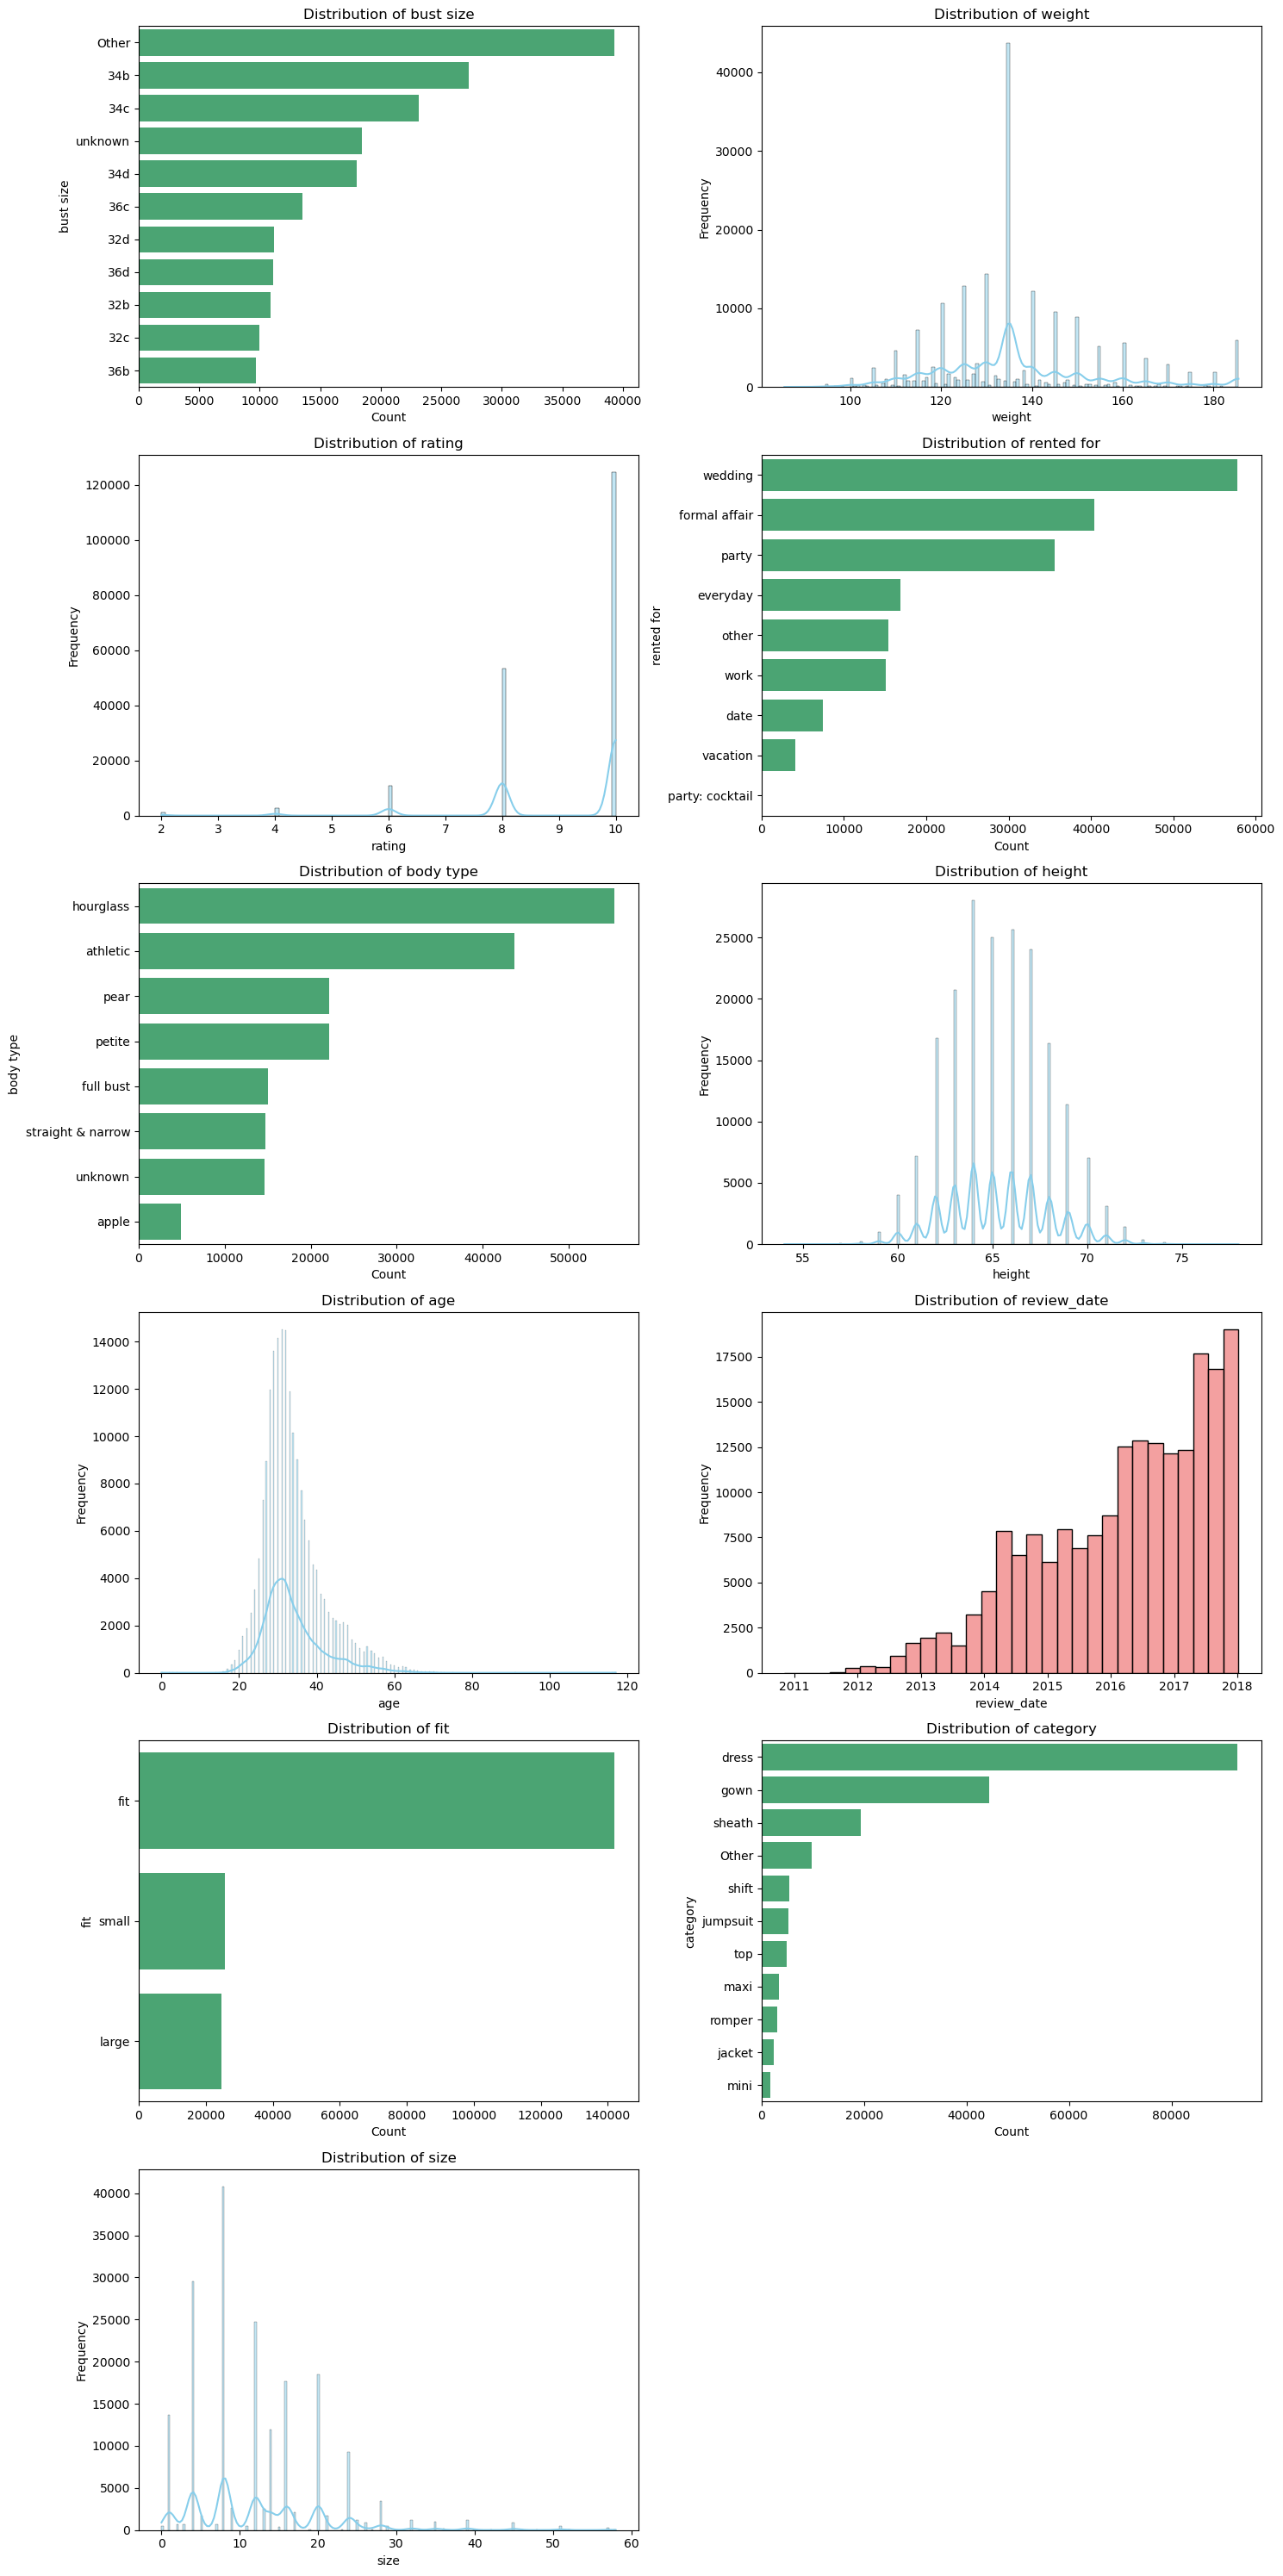

In [16]:
# Columns to plot
columns_to_plot = [
    "bust size", "weight", "rating", "rented for", "body type", 
    "height", "age", "review_date", "fit", "category", "size"
]

# Limit 'category' and 'bust size' to their top 10 most frequent values
top_10_bust_size = df_transformed['bust size'].value_counts().index[:10]
df_transformed['bust size'] = df_transformed['bust size'].where(df_transformed['bust size'].isin(top_10_bust_size), 'Other')

top_10_category = df_transformed['category'].value_counts().index[:10]
df_transformed['category'] = df_transformed['category'].where(df_transformed['category'].isin(top_10_category), 'Other')

# Set up the grid for plotting
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Custom color palette
sns.set_palette("pastel")

# Plot each column's distribution
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if df_transformed[col].dtype in ['int64', 'float64']:  # Numeric columns
        sns.histplot(df_transformed[col], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Frequency')
    elif pd.api.types.is_datetime64_any_dtype(df_transformed[col]):  # Datetime columns
        sns.histplot(df_transformed[col], kde=False, ax=ax, bins=30, color='lightcoral')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Frequency')
    else:  # Categorical or object columns
        sns.countplot(data=df_transformed, y=col, ax=ax, order=df_transformed[col].value_counts().index, color='mediumseagreen')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel('Count')
        ax.set_ylabel(f'{col}')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()
